### Theory and Notes to be aware of

the  “low → high → low” pattern in vega across strikes is exactly what we expect, and it’s driven by the option’s moneyness.

vega is a measure of how sensitive an **option**'s price is to changes in volatility $\text{Vega} = \frac{\delta C}{\delta \sigma}$

You're seeing vega low at deep ITM and deep OTM, and highest around ATM. Here's why:

ATM options have the highest vega...
* At ATM, the option has the most uncertainty about whether it will expire ITM or OTM.
* A small increase in implied volatility greatly increases the chance of profit. This makes the option price very sensitive to volatility, so vega peaks here


Deep in-the-money (ITM) options have lower vega...
* If the strike is far below the spot (for calls), it's almost certain to expire ITM
* Increasing volatility doesn’t change that much → payoff already nearly guaranteed. So the price isn't very sensitive to volatility → lower vega.

Deep out-of-the-money (OTM) options also have low vega...
* For strikes far above spot (for calls), the chance of expiring ITM is already small.
* Volatility can increase, but it doesn’t make a big difference unless it's massive. So again, vega is low.



### To-Do List

* make sure you gothrough the math thoroughly. make sure all of the variables make sense, and f(x,y,z) x,y, are right etc. 
* specify that we're only looking at call options
* make sure you mention that each option price is the lowest across all exchanges
* look into the best way to post/ upload a notebook onto github.
* fix $\tau$, T, t, make sure all of those things are consistent
* make sure you sign the top and bottoom of this. Stamp your style on it. name, light descriptiuon of ur goal maybe. 
* look for other notebook projects online and see what they do for schemes. some may not but you'll find one eventually. maybe as someone. 
* add appropriate bounds to the parameters in the minimization scheme. 
* make sure you arent using the same initial parameters as the guide paper
* should you find market data yourself? it would be a good experience. 
* find data yourself (https://wrds-www.wharton.upenn.edu/pages/about/data-vendors/)
* really look into what this can be used for practically. 
* make sure you know how this project can be used to handle puts. realistically it's the same simulation process for P1&2, but C will be calculated differently. 
* once everything is said and done, fix the table of contents 
* know what the following means: "the  first  term  is  the  present  value  of  the  spot  asset  upon  optimal exercise,  and  the  second  term  is  the  present  value  of  the  strike-price payment". it pertains to equation 4 in this project. just make sure you understand the logic of the equation. 
* make sure your parameter array is actually within the bounds you expect. they cant be outside of the theoretical bounds and must be realistic. 
* Does the price of each option change as the number of calls bought increase? 





### Left Off...

* we were able to make `clibration` take an arbitrary objective function, but we want to add a weight to the new objective function. we need the entire vega array to determine the normalization factor, but cant pass it into the objective function because all of the args will be considered by the minimization.


* figure out a way to get the information into the objective function without disturbing the minimization process. 


* Look into nint, jac, bounds and stuff like that in the minimization function.
* 
* sections 1. and 1.1 look good
* sections 1.2, 1.3 could probably use some work. 
* organize headings and list of contents

june 8: 
- starting from 8. Model Calib. going to go over the text explaining the work, making sure it flows logically
- Make a note of how far we get for the text by the end of today, and where to leave off. you'll have to revisit it from the top down to make sure the flows correctly. 
- conclusion, make a plan, and start. 

end of june 8: 
- i finished the sub-section "Perform Calibration". follow up from here


### font brackets vv

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">


</span>

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">



</span>




<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# Foreword 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One of my main goals for this project is to present the material in a way that’s accessible to those with only a basic understanding of mathematics and coding. Each step is thoroughly explained, including the the underlying theory and the function of each code cell. As such, readers with a minimal background in calculus and/or programming will be capable of following along with the concepts.

</span>





<span style=";color: black ; font-family: Verdana ; font-size: 16px ">


# Introduction


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This notebook presents a personal project focused on implementing a financial model commonly used for pricing options, known as the Heston Model. For an introduction to financial options, refer to [Link 1](https://www.youtube.com/watch?v=VJgHkAqohbU&t=175s&pp=ygUSb3B0aW9ucyBpbiBmaW5hbmNl) and [Link 2](https://www.forbes.com/advisor/investing/what-are-options/). These resources reference both put, and call options. This project only considers vanilla european call options. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The financial model of which this project is based on is known as the Heston Model, introduced by [Steven Heston in 1993](https://www.ma.imperial.ac.uk/~ajacquie/IC_Num_Methods/IC_Num_Methods_Docs/Literature/Heston.pdf). This model became well regarded for its ability to more accurately capture the dynamics of both asset prices and their volatility. Unlike the Black-Scholes model — the benchmark at the time — the Heston model accounts for the influence of stochastic volatility on asset prices. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this project, we begin by outlining the mathematical theory behind the model. We then introduce the market data used in the analysis, implement and test the model, and finally refine the model to improve the results. Key discussions and insights are provided throughout the process. The notebook is organized as follows:

## Contents
1. [Model Theory](#1.-Model-Theory) \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1 [Model Variables and Parameters](##1.1-Model-Variables-and-Parameters)\

2. [Data and Calibration](##2.-Data-and-Calibration)

3. [Before Jumping in...](#3.-Before-Jumping-in...)

4. [Dependencies](#4.-Dependencies)

5. [Data](#5.-Data)

6. [Coding the Heston Model & Integration Method](#6.-Coding-the-Heston-Model-&-Integration-Method)

7. [First Test](#7.-First-Test)

8. [Model Calibration](#8.-Model-Calibration)


</span>



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# 1. Model Theory

**Understanding the mathematical theory is not necessary for understanding this project. You can skip to the final paragraph of this section for a logical explaination of the model.**

Steven Heston's 1993 paper shows that price of an asset at time $t$, $S_t$ can be modelled using the diffusion model

$$
dS_t = rS_tdt+\sqrt{v_t}S_tdW_{S,t} \quad (1)
$$

where $r$ is the risk-free interest rate and $dW_{S,t}$ is a Wiener process. Heston goes to show that the volatility of an asset $v_t$ can be modelled through

$$
dv_t = \kappa (\theta - v_t)dt + \sigma \sqrt{v_t}dW_{v,t} \quad (2)
$$

where $\kappa$ is the rate at which the volatility reverts to it's long-term mean $\theta$, and $\sigma$ is the volatiliy of volatility (vol of vol). $dW_{v,t}$ is another Wiener process and is correlated to $dW_{S,t}$ via

$$
dW_{S,t} \cdot dW_{v,t} = \rho dt \quad (3)
$$

where $\rho$, the correlation coefficient has bounds $-1 \le \rho \le. As with the case of the Black-Scholes equation, the Heston model assumes a solution in the form 

$$
C(S,K,T,r,q) = SP_1 - Ke^{-T \ (r-q)}P_2 \quad (4)
$$ 

where the terms $P_1$ and $P_2$ represent conditional probabilities that the underlying will finish in-the-money (ITM).

<br>

Determining the probabilities $P_j$ is the main focus of computation in this project. Such probabilities can be found by computing 

$$
P_j(x,V,T,K) = \frac{1}{2} + \frac{1}{\pi} \int^{+\infty}_{\phi=0} Re\left[ \frac{e^{-i\phi k} f_j(\phi |x,V,T)}{i\phi}\right] d\phi \quad (5)
$$

where $x = \text{log}(S)$, and the characteristic functions are given by 

$$
f_j(\phi |x,V,\tau) = \text{exp} \{C_j(\phi|\tau)+D_j(\phi|\tau)V + i\phi x \}
$$

where,

$$
C_j(\phi) = i\phi(r-q)\tau + \frac{a}{\sigma^2}\left[(b_j-i\phi\rho\sigma + d_j)\tau - 2\text{ln}\frac{1-g_je^{d_j \tau}}{1-g_j}\right]
$$

$$
D_j(\phi)= [\frac{b_j - i\phi \rho \sigma + d_j}{\sigma^2}] [\frac{1- e^{d_j \tau}}{1-g_j e^{d_j \tau}}]
$$

$$
g_j(\phi)=\frac{b_j - i\phi \rho \sigma + d_j}{b_j - i\phi \rho \sigma - d_j}
$$

$$
d_j(\phi)=\sqrt{(i\phi \rho \sigma - b_j)^2 - \sigma^2 (2 i \phi u_j - \phi^2)}
$$

$$
a=\kappa \theta
$$

$$
u_{j= 1,2}=\left[\frac{1}{2} , -\frac{1}{2}\right]
$$

$$
b_{j=1,2}= [\kappa-\rho\sigma ,  \kappa]
$$

We'll implement this theory in code in Section 6. Computing Equation 4 returns the price of a call option given sufficient option contract information (variables) and asset parameters. The variables and parameters required to price an option are described in the section below.

</span>



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

## 1.1 Model Variables and Parameters

### Option Contract Variables
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Contract <u>variables</u> refer to the set of information about an option contract that is *known* in advance. By analogy, when someone enters into a mortgage agreement, the borrower is aware of specific terms such as the loan amount, interest rate, loan term, down payment, etc. Similarly, when purchasing an option, the buyer knows certain key variables. These include:


* **$S_t$** - Spot Price. &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;  The current price of the underlying at the time the option is purchased.
* **$K$** - Strike Price. &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The predetermined price at which the asset can be bought when the option is exercised at maturity.
* **$T$** - Time to Maturity. &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The time (in years) until the the contract may be exercised.
* **$r$** - Rate. &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; The theoretical return on a risk-free investment over the option’s time to maturity, often based on government bonds.
* **$\text{Ask}$** - Ask Price. &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The selling price. 


### Asset Parameters
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Unlike contract variables, which are known prior to the purchasing of the option, <u>parameters</u> refer to the mathematical characteristics of the underlying asset. These are not fixed or perfectly deterministic; instead, they evolve over time and are often uncertain. For example, while the volatility of an asset can be estimated with reasonable accuracy, it fluctuates as market conditions change. There are no exact formulas to determine these parameters, but as we'll see, techniques such as model calibration can be used to generate reliable approximations. The Heston Model parameters are: 

* **$V_t$** - Spot Volatility. &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; The instantaneous volatility of the underlying asset at the time the option is purchased.
* **$\sigma$** - Volatility of the Volatility (vol of vol). &nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; The rate at which the volatility of an asset changes over time. Reflects uncertainty in an asset's volatitlity.
* **$\theta$** - Long-Term Mean of the Volatility. &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp;The average value the asset's volatility tends to revert to over time. 
* **$\kappa$** - Rate of Mean Reversion. &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The rate at which the asset's volatility returns back to the long-term mean $\theta$.
* **$\rho$** - Correlation Factor. &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; Represents the correlation between the asset price and its volatility. A negative $\rho$ often reflects the tendency for volatility to increase when the asset price drops.

</span>





<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

## 2. Before Jumping in... 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To price an option that matures in $T$ years from "today", denoted $C(T)$, we'll rely on historical market data. At the end of each trading day, option contract variables $(S_T, K, T, r)$ are known to institutions offering these options. However, accurate pricing under the Heston model depends critically on selecting appropriate values for the model parameters $(V_t, \sigma, \theta,\kappa,\rho)$. In this project, we determine these values through a process known as model calibration.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As mentioned earlier, we have access to real market data, specifically, option contracts published by financial institutions. To produce reliable parameter estimates, we calibrate the model to this historical data. Model calibration involves adjusting the parameters to make the model’s output align as closely as possible with observed market prices. The technique we'll use is nonlinear least squares calibration.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the sections that follow, we will first introduce the market data, then implement the Heston model and demonstrate its ability to price options using arbitrary parameters. We’ll then show how to calibrate the model to the data, use it to price future options, and compare those prices to actual market values. Since we have market data from all of 2018, we can select a "reference date" in the middle of our dataset, giving us both historical data for calibration and forward data for validation.

</span>


<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# 4. Dependencies


</span>

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt 
import seaborn as sns

# to calibrate the model parameters
from scipy.optimize import minimize

# to create a partial function in the optimization process
from functools import partial

# exponential terms in the computation of calls result in runtime warnings. These two lines turn off the warnings. 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# 5. Data

The market dataset consists of 8963 S&P 500 call options from January - December, 2018.

</span>


In [2]:
SnP = pd.read_excel('Data/S&P_500.xlsx',
                    index_col=False,
                    header=0)
SnP['Date of Price'] = pd.to_datetime(SnP['Date of Price'])

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

Graphing the price of the index throughout the fiscal year...

</span>

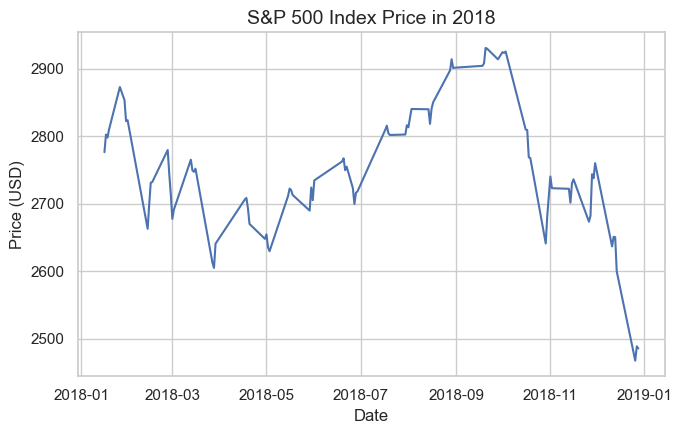

In [3]:
# Creating dataframes sampling only one spot date and date-stamp from each unique date in SnP
sampled_df = SnP.groupby(SnP['Date of Price'].dt.date).apply(lambda x: x.sample(1)).reset_index(drop=True)
price_array = sampled_df.iloc[:,-1].astype(float).to_numpy()
date_array = pd.to_datetime(sampled_df['Date of Price'])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4.5))
sns.lineplot(x=date_array, y=price_array, linewidth=1.5)
plt.title("S&P 500 Index Price in 2018", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.tight_layout()
plt.show()



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

Looking into the first 10 rows of the dataframe "SnP"

</span>

In [4]:
SnP.head(10)

,Date of Price,Maturity,Strike,min Ask,Implied Volatility,Vega/Kappa,Rate,Spot
0,2018-01-16,94,1200,1575.6,0.612367,9.031871,1.45,2776.419922
1,2018-01-16,94,1350,1426.5,0.551055,13.246970,1.45,2776.419922
2,2018-01-16,94,1400,1376.8,0.530554,14.793470,1.45,2776.419922
3,2018-01-16,94,1450,1327.3,0.521513,18.835150,1.45,2776.419922
4,2018-01-16,94,1500,1277.4,0.492622,18.771730,1.45,2776.419922
5,2018-01-16,94,1550,1227.7,0.472309,20.604030,1.45,2776.419922
6,2018-01-16,94,1600,1178.3,0.464521,26.263460,1.45,2776.419922
7,2018-01-16,94,1650,1128.4,0.436312,25.915910,1.45,2776.419922
8,2018-01-16,94,1700,1078.7,0.418110,28.802290,1.45,2776.419922
9,2018-01-16,94,1750,1029.3,0.405889,34.429930,1.45,2776.419922




<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Note that for any given date in the dataset, there are multiple strike prices and corresponding ask prices. On each trading day, financial institutions list option contracts across a range of strike prices, each with its own ask price, allowing the buyer to choose the strike. On any given date, the available option contracts across different strikes typically look like the following:

</span>

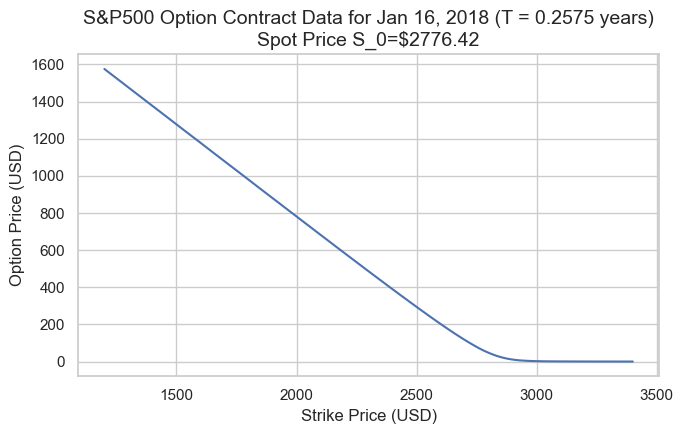

In [5]:
# creating a dataframe of S&P500 option prices at various strike prices for the date Jan 10, 2018 (contract maturity length is 94 days).
option_contracts = SnP[SnP['Date of Price'] == '2018-01-16']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4.5))
sns.lineplot(x=option_contracts.iloc[:,2], y=option_contracts.iloc[:,3])
plt.title("S&P500 Option Contract Data for Jan 16, 2018 (T = 0.2575 years)\nSpot Price S_0=$2776.42", fontsize=14)
plt.xlabel("Strike Price (USD)", fontsize=12)
plt.ylabel("Option Price (USD)", fontsize=12)
plt.tight_layout()
plt.show()



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

Our goal is to recreate these curves as accurately as possible.

Some quatitative descriptions of the dataset:

</span>


In [6]:
print(f"First Date: {SnP.iloc[0,0]}, Last Date: {SnP.iloc[-1,0]}")
N_days = SnP['Date of Price'].nunique()
counts_per_day = SnP.groupby(SnP['Date of Price'].dt.date).size()
print(f"Number of Unique Days: {N_days}")
print(f"Average Number of Strikes per Day: {counts_per_day.mean()}")
print(f"Min Number of Strikes per Day: {counts_per_day.min()}")
print(f"Max Number of Strikes per Day: {counts_per_day.max()}")
print(f"Median Number of Strikes per Day: {counts_per_day.median()}")


First Date: 2018-01-16 00:00:00, Last Date: 2018-12-28 00:00:00
Number of Unique Days: 98
Average Number of Strikes per Day: 91.45918367346938
Min Number of Strikes per Day: 26
Max Number of Strikes per Day: 140
Median Number of Strikes per Day: 98.0




<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# 6. Coding the Heston Model & Integration Method

$$
C(S,K,T, r, q) = SP_1 - Ke^{-T \ (r-q)}P_2 \quad (4)
$$ 

<br>

$$
P_j(x,V,T,K) = \frac{1}{2} + \frac{1}{\pi} \int^{+\infty}_{\phi=0} Re\left[ \frac{e^{-i\phi k} f_j(\phi |x,V,T)}{i\phi}\right] d\phi \quad (5)
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To compute the probabilities $P_1$ and $P_2$ we must compute the integral in equation 5. For this project, I chose to implement Simpson's 3/8 rule using the `simpson()` function below. This numerical integration method is both simple to implement and versatile, offering good accuracy across a wide range of functions with relatively low computational error. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In theory, the integral needs to be computed from 0 to $\infty$ but this is obviously not possible. An upper bound of $200$ seems to suffice. A starting point of $a=0$ leads to an undefined integrand, thus we start from $a=0.0001$.

</span>

In [7]:
### INTEGRATION PARAMETERS 
integration_a = 0.0001      # start
integration_b = 200         # stop
integration_n = 500         # number of steps    
int_params = integration_a, integration_b, integration_n


def simpson(f, P1P2, params, args, integration_parameters = int_params):

    """
    perform's numerical integration on an arbitrary function f, following Simpson's 3/8 method.
    
    args: 
        f: the integrand function
        P1P2 = [1,2]: for the two probabilities in Equation 5
        params: Heston model parameters (V_t, rho, kappa, theta, sigma), type=numpy array
        integration_parameters: a,b,n = integration start, stop, #_steps
    outputs: 
            SoA*(h/3): Sum of Areas times the 
    """

    a,b,n = integration_parameters
    wrapped_function = lambda phi: f(phi, P1P2, params, args)
    
    h = (b-a)/n
    xs = np.linspace(a,b,n+1)
    ys = wrapped_function(xs)

    if (n % 2) != 0:
        raise ValueError("n must be divisable by 2.")
    
    SoA = ys[0] + ys[-1] + 4*np.sum(ys[1:-1:2]) + 2*np.sum(ys[2:-2:2])

    return SoA*(h/3)



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

`simpson()` requires the function to be integrated to be passed into it, thus requiring the function `integrand()` which directly represents the integrand in Equation 5.

</span>

In [8]:
def integrand(phi, P1P2, params, args):

    """
    evaluates the integrand at a point phi. Used in conjuction with the simpson function to integrate over the entire phi interval.

    args:
            phi: integration parameter
            P1P2 = [1,2]: for the two probabilities in Equation 5
            params: Heston model parameters (V_t, rho, kappa, theta, sigma), type=numpy array
            args: Contract information (S_t, K, T, r), type=numpy array
    outputs:
            integrand: the value of the integrand function evaluated at phi
    """

    q = 0        # set dividend yield to 0
    t = 0        # set start time to 0  

    # unpacking the params and args arrays 
    V_t, rho, kappa, theta, sigma = params
    S_t, K, T, r = args


    # building the contents of the theory outlined in the introduction
    C,D,g,d,f=np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    b=np.array([kappa - rho*sigma, kappa])[P1P2-1]
    u=np.array([0.5, -0.5])[P1P2-1]
    a=kappa*theta

    xx = 1j*phi*rho*sigma
    tau = T-t
    k = np.log(K)

    d = np.sqrt(np.power(xx - b,2) - np.power(sigma,2) * (2j*phi*u - np.power(phi,2)))
    g = (b - xx + d) / (b - xx - d)

    C = 1j*phi*(r-q)*tau + (a/np.power(sigma,2)) * ( (b-xx+d)*tau - (2*np.log( (1-g*np.exp(d*tau)) / (1-g) )) )
    D = ((b - xx + d) / (np.power(sigma,2))) * ((1-np.exp(d*tau))/(1-g*np.exp(d*tau)))

    f = np.exp(C + D*V_t + 1j*phi*np.log(S_t))
       
    integrand = (np.exp(-1j*phi*k)*f/(1j*phi)).real
    
    return integrand

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The function `call()` computes the price of a call option in accordance with Equation 4. First,  the probabilities $P_j$ are calculated by calling `simpson()` to evaluate the integrals in Equation 5 for $j = 1, 2$. Once the probabilities are determined, Equation 4 is computed to return the call option price, based on a complete set of option contract variables $(S, K, T, r)$. Note that $q$, the dividend yield, is set to zero for simplicity. 
$$
C(S,K,T, r, q=0) = SP_1 - Ke^{-T \ (r-q)}P_2 \quad (4)
$$ 

</span>

In [9]:
def call(f, params, args):

    """
    Calculates the price of a call option given a set of contract information and asset parameters

    Args:
        f: the function to be integrated (to calculate P1 & P2)
        params: Heston model parameters (V_t, rho, kappa, theta, sigma), type=numpy array
        args: Contract information (S_t, K, T, r), type=numpy array        
    Outputs:
        call: price of the call option (a single float value based on one strike price)
    """
    
    q = 0        # set dividend yield to 0
    t = 0        # set start time to 0

    S_t, K, T, r = args

    
    P1 = (1/2) + (1/np.pi) * simpson(f, P1P2=1, params=params, args=args)
    P2 = (1/2) + (1/np.pi) * simpson(f, P1P2=2, params=params, args=args)

    call = S_t*P1 - K*np.exp(-(r-q)*(T-t))*P2
    
    return call


<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# 7. First Test

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The previous three functions provide the functionality required to price options, so let's price some options! To do so, we'll need a set of contract variables to work with. Let's use the third day in the `S&P500` dataset.

</span>

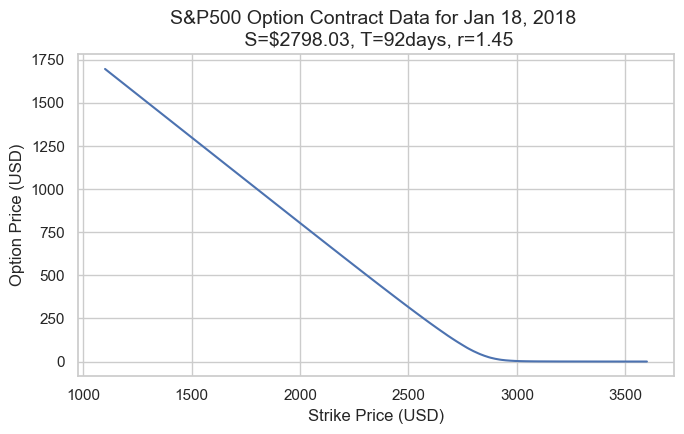

In [10]:
# creating a subset dataframe for contract data from day 3 in SnP
day3 = SnP[SnP['Date of Price'] == '2018-01-18'].copy()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4.5))
sns.lineplot(x=day3.iloc[:,2], y=day3.iloc[:,3])
plt.title("S&P500 Option Contract Data for Jan 18, 2018 \n S=$2798.03, T=92days, r=1.45", fontsize=14)
plt.xlabel("Strike Price (USD)", fontsize=12)
plt.ylabel("Option Price (USD)", fontsize=12)
plt.tight_layout()
plt.show()

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For our first test, we'll choose an arbitrary set of parameters to satisfy the model arguments. Remember, we don't know what the parameters should be valued at, but we can pick reasonable estimates. I've referenced Steven Heston's original paper as a guide, in which he provides "Default parameters for simulation of option prices".

</span>

In [11]:
# initial guess of parameters
V_t = 0.07
kappa = 2
sigma = 0.01
rho = -0.3
theta = 0.08
params0 = [V_t, rho, kappa, theta, sigma]

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now, using the `calculate_and_plot()` function below, we'll compute option prices for each strike price in the `day3` dataset.  We'll then compare our model prices with the actual market prices quoted by the banks on that day.

</span>

In [12]:
def calculate_and_plot(data, params): 

    """
    creates an array of call-strike prices based on the contract data in "data",
    plots the model prices against market prices in "data" 

    Args:
        data: market contract data for a single day
        params: initial guess of paraeters V_t, rho, kappa, theta, sigma
    Outputs:
        calls: call price array determined by the Heston model
        error: array of absolute error between model and market calls at each strike price.     
    """

    calls = []
    error = []

    # Used to determine the date of the option data for the graph title
    date = data.groupby(data['Date of Price'].dt.date).apply(lambda x: x.sample(1)).reset_index(drop=True)
    date = str(date.iloc[0, 0].date())

    # unpacking each relevant column in the dataset to make the code below easier to read
    S_t = data['Spot']
    K = data['Strike']
    T = data['Maturity']/365
    r = data['Rate']/100
    Ask = data['min Ask']

    # iterate through each strike and calculate the corresponding call price and error
    for i in range(len(S_t)):
        model_args = S_t.iloc[i], K.iloc[i], T.iloc[i], r.iloc[i]
        calls.append(call(integrand, params, model_args))
        error.append(abs(calls[i] - Ask.iloc[i]))


    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7, 4.5))
    sns.lineplot(x=K, y=calls, color = 'blue', label = 'Model Calls', linewidth=1.5)
    sns.lineplot(x=K, y=Ask, color = 'red', label='Model Calls', linewidth=1.5)
    plt.title(f"Comparing Model Option Prices to Market Prices for {date}", fontsize=14)
    plt.xlabel("Strike Price (USD)", fontsize=12)
    plt.ylabel("Option Price (USD)", fontsize=12)
    plt.tight_layout()
    plt.show()

    print(f'Model-Market error (sum of difference) = {np.array(error).sum()}')

    return calls, error

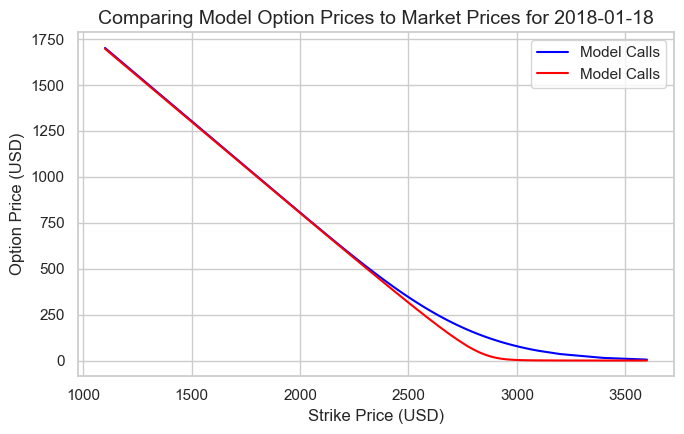

Model-Market error (sum of difference) = 2930.415384873889


In [13]:
day3_calls, day3_error = calculate_and_plot(day3, params0)

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Not bad! The model appears to price options reasonably well, particularly in the strike range between $K = 1000$ and $K = 2400$. Beyond this range, however, we begin to see noticeable deviations from the market prices. Overall, this gives us confidence that the model is behaving as expected and is ready for further refinement.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Currently, the aggregate error, defined as the sum of the absolute differences between the model’s prices and the market prices across all strikes, is 2,910. Let’s see if we can reduce this error through calibration.



</span>


<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# 8. Model Calibration

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The discrepancy between our model prices and market prices stems from an imperfect initial choice of parameters. To improve accuracy, we’ll calibrate the model. This process begins with an initial guess for the parameters, and the calibration process will return a tuned parameter array $[V_0, \rho, \kappa, \theta, \sigma]$ that should yield more accurate prices. 


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For this project I've chosen to use the `minimize()` function from the [scipy.optimize library](https://docs.scipy.org/doc/scipy/tutorial/optimize.html). This function adjusts a set of parameters to minimize a user-defined <u>objective function</u>. The library offers a variety of optimization algorithms, and the choice of method should be made based on the characteristics of the specific problem. In this case, I’ve selected the Sequential Least Squares Programming (SLSQP) algorithm.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;An objective function quantifies the error between the model-generated prices and the actual market prices. There are several ways to define this error, depending on the goal of the calibration. In this project, we begin by using the sum of squared differences between the model and market prices as our objective function. The calibration process then works by adjusting the model parameters to minimize this error, thereby improving the model’s fit to observed data. Equation 6 represents the formal definition of this minimization process. 

$$
min_\Omega S(\Omega) = min_\Omega \sum_{i=1}^{N}\left[C_i^\text{Model}(K_i,T_i) - C_i^\text{Market}(K_i,T_i)\right]^2 \qquad (6)
$$

</span>

In [14]:
def objective_function1(params, S_t, K, T, r, Ask, vega):

    """
    calculates the sum of the squared model-market errors 
    Args:
        params: V_t, rho, kappa, theta, sigma
        Market data of the underlying: S_t, K, T, r, Ask, vega. the data the calibration is fitting to
    Output:
        Sum of squared errors (SSE) 
    """

    Error = []

    # determine error at each strike and append to Error array 
    for i in range( len(S_t) ):
        model_args = S_t[i], K[i], T[i], r[i]
        Error.append( np.power(call(integrand, params, model_args) - Ask[i], 2) )

    SSE = np.array(Error).sum()
    
    return SSE




<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

### Creating the Calibration Dataset and Initial Parameter Guess

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In a real-world setting, we only have access to historical market data when calibrating a model. Therefore, if we want to price options on “day3,” we must calibrate the model using data from “day1,” “day2,” or a combination of both. Since we previously tested the model on day3, we’ll calibrate the model using the first two days and then re-evaluate its performance on day3. For the initial guess of parameters, we’ll continue using the same values we previously selected.

</span>

In [15]:
# Making the subdataset for the first two days in SnP
day1 = SnP[SnP['Date of Price'] == '2018-01-16'].copy()
day2 = SnP[SnP['Date of Price'] == '2018-01-17'].copy()
day3 = SnP[SnP['Date of Price'] == '2018-01-18'].copy()
day1and2 = SnP[SnP['Date of Price'] <= '2018-01-17'].copy()

# Initial parameter guess
V_t = 0.07
kappa = 1.5
sigma = 0.01
rho = -0.3
theta = 0.08
params0 = [V_t, rho, kappa, theta, sigma]


<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

<div style="display: flex; align-items: center; justify-content: space-between;">
  <div>
    <p>
    
### Perform Calibration

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It may be helpful to review the description of the calibration function below. When calibrating the model using data from a single day, the function takes an initial array of parameters and returns a tuned array optimized for that day. However, when calibrating across multiple days, the function operates recursively. It calibrates the parameters using data from the first day, then uses the resulting tuned parameters as the starting point for the next day, and so-on until the final parameter array is obtained. The diagram on the right illustrates this process.

</p>
  </div>
  <div>
    <img src="data/Calib flow chart.png" alt="Image" style="height: 400px; float: right;">
  </div>
</div>


</span>


In [16]:
def calibration(params, data, objective_function, calibration_method = 'SLSQP'):

    """
    performs the calbration process. Dependent on if the calibration dataset has one or more days to train from:
        one day: the calibration process executes normally, fitting the model by tuning the parameters to data of a single day.
        multiple days: determines the parameters for the first day, then uses the trained parameter array to feed into the next day,
            repeating this process until the entire calibration dataset has been considered. 

    Args: 
        params: the initial guess of parameters to be tuned: V_t, rho, kappa, theta, sigma
        data: the dataset to train the model parameters on
        objective_function: defining which objective function to minimize in the calibratiob process
        calibration_method: defining which minimization process to use from the scipy.optimize.minimize library,
                            DEFINE THE OPTIONS HERE
    Output:
        params: calibrated parameter array 
    """

    # determining if the dataset is composed of one or multiple unique days 
    N_days = data['Date of Price'].nunique()

    # performs model calibration based on a dataset composed of a unique day of option data
    if (N_days == 1):
        S_t, K, T, r, Ask, vega = np.array(data['Spot']), np.array(data['Strike']), np.array(data['Maturity'])/365, np.array(data['Rate'])/100, np.array(data['min Ask']), np.array(data['Vega/Kappa'])
        
        # creating a partial function so we can pass information of vega into the objective function without using vega as a calibration parameter
        obj_fcn = partial(objective_function, vega=vega)
        calibration_results = minimize(obj_fcn, x0=params, args = (S_t, K, T, r, Ask), method = calibration_method, tol=1e-6)
        params = np.array(calibration_results.x)

    # performs model calibration based on the logic for a calibration dataset composed of multiple days
    else:
        grouped_data = data.groupby(data['Date of Price'].dt.date)
        i = 0
        print(f"input parameter array: {params}")
        
        for date, group in grouped_data:
            i += 1
            S_t, K, T, r, Ask, vega = np.array(group['Spot']), np.array(group['Strike']), np.array(group['Maturity'])/365, np.array(group['Rate'])/100, np.array(group['min Ask']), np.array(group['Vega/Kappa'])
            
            # creating a partial function so we can pass information of vega into the objective function without using vega as a calibration parameter            
            obj_fcn = partial(objective_function, vega=vega)
            calibration_results = minimize(obj_fcn, x0=params, args = (S_t, K, T, r, Ask), method = calibration_method, tol=1e-6)
            params = np.array(calibration_results.x)
            print(f"tuned parameter array after iteration {i}: {params}")

    print(f'\nmessage: {calibration_results.message}')
    print(f'success: {calibration_results.success}')
    print(f'n iterations: {calibration_results.nit}')
    print(f'tuned parameters: {np.array(calibration_results.x)}')

    return params




<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

Performing the calibration...
</span>

In [17]:
calib_results = calibration(params0, day1and2, objective_function1)

input parameter array: [0.07, -0.3, 1.5, 0.08, 0.01]
tuned parameter array after iteration 1: [ 0.01260628 -0.63582512  0.03189236  0.05641723  0.4050636 ]
tuned parameter array after iteration 2: [ 0.01301552 -0.59802655 -0.03688092  0.21919705  0.36826548]

message: Iteration limit reached
success: False
n iterations: 100
tuned parameters: [ 0.01301552 -0.59802655 -0.03688092  0.21919705  0.36826548]






<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Success! The output messages above display the tuned parameter array along with additional descriptive information about the optimization process. Now that we’ve calibrated the model, we can test its performance using option data from day 3 and calculating the aggregate error. To do this, we’ll use the `calculate_and_plot(data, params)` function defined earlier in cell 35.

</span>

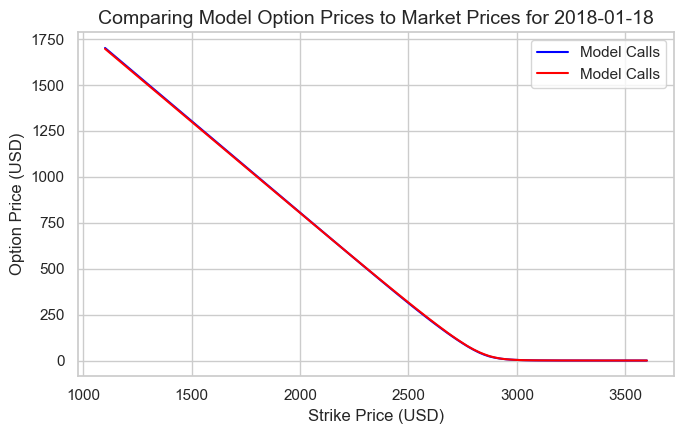

Model-Market error (sum of difference) = 152.70084508020955


In [18]:
calls1, error1 = calculate_and_plot(day3, calib_results)



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Looking better! We can see that the aggregate error dropped significantly from 2910 to around 153 and the graph shows a much closer fit in the range of $\text{K}=2500$ to $\text{K}=3000$. These results are encouraging and suggest that the calibration process is working well. However, there may still be room for improvement by exploring alternative objective functions.

</span>


<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# 9. Testing a New Objective Function

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We can try to further improve the accuracy of our parameter estimation by refining the objective function used in the calibration process. Specifically, we’ll introduce weights into the objective function. A weight adjusts the influence of each data point on the total error, effectively prioritizing some observations over others. This can be represented mathematically as

$$
min_\Omega S(\Omega) = min_\Omega \sum_{i=1}^{N} w_i\left[C_i^\text{Model}(K_i,T_i) - C_i^\text{Market}(K_i,T_i)\right]^2 \qquad(7)
$$

where we'll chose the weight $(w_i)$ to be, 

$$
w_i = \frac{\text{vega}_i}{\sum_j (\text{vega} / \kappa)_j} \qquad (8)
$$


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the `SnP` dataset we have information on the "Vega/kappa" of each option contract. This should serve as an appropriate weight as it peaks near-the-money, contracts of which carry more pricing sensitivity and market relevance. Note that we normalize weight by dividing by the sum of the entire vega/kappa column to ensure each weight doesnt get too out of hand.

<br>

The vega of an option measures the sensitivity of an option's price to changes in volatlity. This is expressed mathematically as 

$$
\text{Vega} = \frac{\delta C}{\delta \sigma} = \frac{\delta \ (\text{price of the option)}}{\delta \ (\text{volatility})} \qquad(9)
$$

Let's unpack what this means. 
* vega captures how sensitive an option's price is to volatility.
* Kappa governs how quickly the variance process reverts to its mean.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This means that options with a higher vega/kappa are more sensitive to persistent changes in volatility. The value of vega/kappa peaks at strike prices equal (or close) to the spot price of the asset, therefore we assign a stronger bias to option contracts that are more likely to mature into profitable options. 

<br>

Let's implement the new objective function 

$$
min_\Omega S(\Omega) = min_\Omega \sum_{i=1}^{N} \  \frac{\text{vega}_i}{\sum_j (\text{vega} / \kappa)_j}  \ \left[C_i^\text{Model}(K_i,T_i) - C_i^\text{Market}(K_i,T_i)\right]^2 \qquad(10)
$$


</span>

In [19]:
def objective_function2(params, S_t, K, T, r, Ask, vega):

    """
    calculates the objective function as outlined in Equation 10. 
    Args:
        params: V_t, rho, kappa, theta, sigma
        Market data of the underlying: S_t, K, T, r, Ask, vega. the data the calibration is fitting to
    Output:
        SWSE : sum of weighted squared errors
    """

    Error = []    
    normalization_factor = vega.sum()

    # iteratively determines the error (following Eq. 10) at each strike price and appends to Error array
    for i in range( len(S_t) ):
        weight = vega[i] / normalization_factor
        model_args = S_t[i], K[i], T[i], r[i]
        Error.append( weight *  np.power(call(integrand, params, model_args) - Ask[i], 2) )

    # summing the weighted squared errors
    SWSE = np.array(Error).sum()
    
    return SWSE



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now, let’s repeat the same process as before, this time using the new weighted objective function. We’ll calibrate the model using data from day 1 and day 2, and then test the performance of the updated parameter set on day 3 to evaluate any improvements in pricing accuracy.

</span>

In [20]:
calib_obj2 = calibration(params0, day1and2, objective_function2)

input parameter array: [0.07, -0.3, 1.5, 0.08, 0.01]
tuned parameter array after iteration 1: [ 0.01010048 -0.63769378  0.36569795  0.07318254  0.47463301]
tuned parameter array after iteration 2: [ 0.01146515 -0.59448501  0.36804326  0.02827747  0.4268135 ]

message: Optimization terminated successfully
success: True
n iterations: 11
tuned parameters: [ 0.01146515 -0.59448501  0.36804326  0.02827747  0.4268135 ]


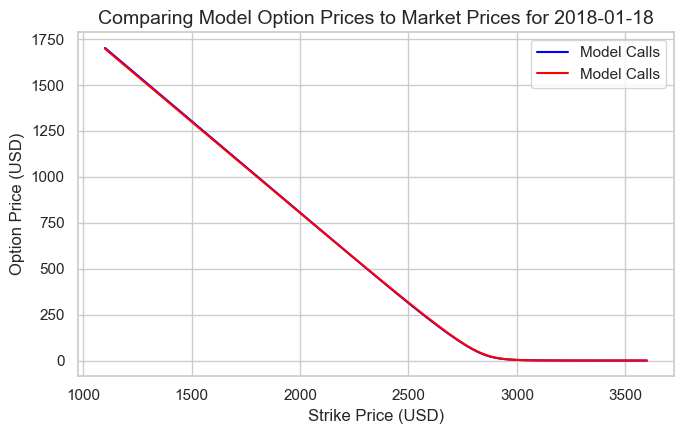

Model-Market error (sum of difference) = 149.21950611214686


In [21]:
calls2, error2 = calculate_and_plot(day3, calib_obj2)



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The results appear to have improved, but only marginally. Let's look into where the model is underperforming. Specifically, we’ll visualize the model-market error as a function of strike price to identify where the largest deviations occur.

</span>

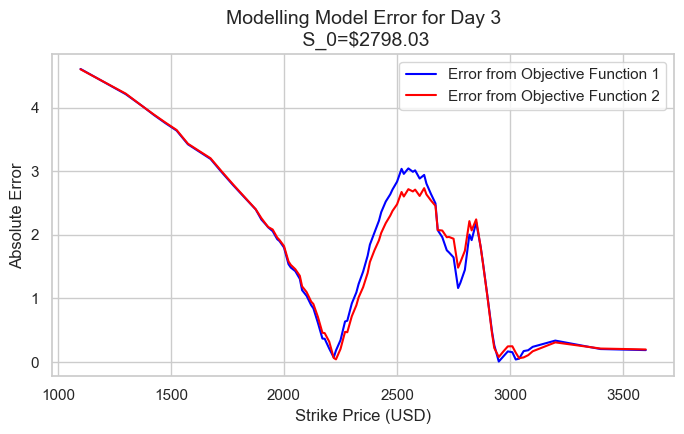

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4.5))
sns.lineplot(x=day3['Strike'], y=error1, color = 'blue', label = "Error from Objective Function 1", linewidth=1.5)
sns.lineplot(x=day3['Strike'], y=error2, color = 'red', label='Error from Objective Function 2', linewidth=1.5)
plt.title(f"Modelling Model Error for Day 3\n S_0=$2798.03", fontsize=14)
plt.xlabel("Strike Price (USD)", fontsize=12)
plt.ylabel("Absolute Error", fontsize=12)
plt.tight_layout()
plt.show()



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This is interesting information. Clearly, for both objective functions, the model is pricing poorly at low strikes with pricing accuracy improving up to approximately $K=2230\$$. Beyond this point the error begins to increase, forming a bell-ish shaped curve centered around the spot price. Let's look into the $\text{vega/kappa}$ column to see if we can find any interesting information. 

</span>

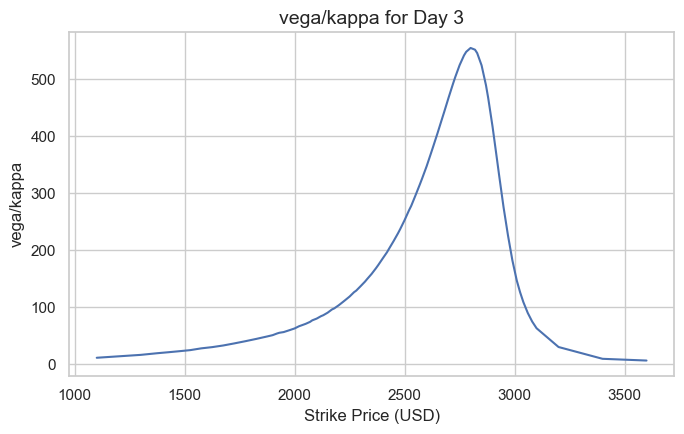

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4.5))
sns.lineplot(x=day3['Strike'], y=day3['Vega/Kappa'], linewidth=1.5)
plt.title("vega/kappa for Day 3", fontsize=14)
plt.xlabel("Strike Price (USD)", fontsize=12)
plt.ylabel("vega/kappa", fontsize=12)
plt.tight_layout()
plt.show()



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Without looking too much into the details, it's interesting to notice that accuracy improved across much of the "middle hump" when transitioning from objective functon 1 to 2. This improvement is likely due to the introduction of the vega/kappa weighting, as the vega/kappa curve reaches its peak in this region.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This observation clearly needs further investigation to determine it's validation. It seems clear that the vega/kappa weights had no influence on the accuracy of pricing at low strikes $K<2230\$$, and may have hindered pricing accuracy at higher strikes $K>2900\$$


</span>



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# Next Steps and Conclusion 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For the purposes of this project, I elect to conclude here. Throughout this case study we introduced S&P 500 option market data from 2018 and showed that the Heston Model - as outlined in Steven Heston's 1993 paper - is capable of pricing options using arbitrary option data and parameters. We then calibrated the model to the market data, displaying how tuning the model parameters leads to more accurate pricing. It was then showed that model results can be improved my upgrading the objective function, and a discussion on the model's error was breifly explored.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Although there is room for improvement and analysis, the goal of this project is only to provide a concise case study of the Heston Model. I intend of presenting this for employment prospecting and thus it must be succinct. Let's explore the key takeaways and areas for improvement.

</span>



<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

## Key Take-Aways

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;At the end of the day, we've shown that this model is capable of pricing options within $4 USD from the analysis we've done. Pricing models such as the Heston Model are used in many cases, such as: 

* Portfolio Optimiztion: Pricing models can be used to hedge risk, optimize risk-return metrics (Sharpe ratio), help perform stress testing (can be used to simulate portfolio performance under extreme conditions such as high market volatility or interest rate shocks to help inform decisions).

* Identify Mispricing: Quant trading desks use pricing models to detect model-market discrepencies, generating arbitrage opportunities. 

* Advise Client Pricing: For banks, or any other institution requiring such services.

* Other: Generate implied volatility surfaces, generating synthetic data for simulations and ML purposes.

As the world moves further towards data driven strategies, not only financial institutions, but governments, sports teams, and beyond, will gain an edge on competition by using advanced analytics to inform on decisions. While this implementation offers a useful framework for pricing, I recognize that this is likely a simplified version compared to what is used in practice. I'm eager to see how industry actors extend these models in practice. 


</span>

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

## Opportunities for Improvement

One area that I am interested in exploring is alternative methods of determining the model parameters. Some options include: 

* Randomly sample Heston parameters within reasonable bounds, compute option prices for each set, and build a dataset of inputs (option prices) and targets (parameter sets). Train a neural network to learn the inverse mapping by minimizing a loss function.

* Maximum Likelihood Estimation (MLE): Involves discretizing the Heston stochastic differential equations (monte carlo) to approximate the continuous dynamics of the asset and volatility processes. Using historical asset price data, a log-likelihood function is constructed to quantify the probability of observing the data given a set of parameters. Numerical optimization is then used to find the parameters that maximize this likelihood.

These options may not be the easiest to implement and would require time to achieve. As an alternative to estimating all parameters, certain values such as the long-term mean of volatility, $\theta$, can be determined more directly through simpler techniques.

</span>

<span style=";color: black ; font-family: Verdana ; font-size: 16px ">

# End

</span>

# Appendix and Extra Analysis

Price options and maps aggregate error for multiple days beyond one day in the future. I imagine this could be used to test how well the model parameters perform as time passes. The usefulness of this method is doubted since the model parameters obviously change over time. 

In [24]:
def check_calibration(data, params, multiple_days = False): 

    calls = []
    error = []
    multiple_day_error = []
    unique_dates = data['Date of Price'].dt.date.unique()

    if multiple_days:
        grouped_data = data.groupby(data['Date of Price'].dt.date)

        for date, group in grouped_data:

            S_t = group['Spot']
            K = group['Strike']
            T = group['Maturity']/365
            r = group['Rate']/100
            Ask = group['min Ask']

            # other
            vega = group['Vega/Kappa']
            impVol = group['Implied Volatility']

            for i in range(len(group)):
            
                model_args = S_t.iloc[i], K.iloc[i], T.iloc[i], r.iloc[i]
                CALL = (call(integrand, params, model_args))
                error.append(abs(CALL - Ask.iloc[i]))
            
            multiple_day_error.append(np.array(error).sum())
            error = []

        plt.plot(multiple_day_error)

    else:

        S_t = data['Spot']
        K = data['Strike']
        T = data['Maturity']/365
        r = data['Rate']/100
        Ask = data['min Ask']
        vega = data['Vega/Kappa']
        impVol = data['Implied Volatility']
        
        for i in range(len(S_t)):
            model_args = S_t.iloc[i], K.iloc[i], T.iloc[i], r.iloc[i]
            calls.append(call(integrand, params, model_args))
            error.append(abs(calls[i] - Ask.iloc[i]))
    
        plt.plot(K, calls, label = "Model Calls")
        plt.plot(K, Ask, label = "Market Calls")
        plt.legend()
        plt.xlabel("Strikes")
        plt.ylabel("Call Values")
        plt.show()

        print(f'Model-Market error (sum of difference) = {np.array(error).sum()}')

    return